In [3]:
# import basic libraries
import yt
import pickle
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10
from astropy import units as u

# import halo catalogue func
from yt.analysis_modules.halo_analysis.api import *

# load halo dataset
halos_ds = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres180.0.h5')

yt : [INFO     ] 2017-07-25 15:35:13,018 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-07-25 15:35:13,020 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-25 15:35:13,022 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-25 15:35:13,024 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-07-25 15:35:13,026 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-25 15:35:13,027 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-07-25 15:35:13,028 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-25 15:35:13,029 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-25 15:35:13,030 Parameters: hubble_constant           = 0.6933


In [12]:
import tempfile
import shutil
import os

# Create temporary directory for storing files
tmpdir = tempfile.mkdtemp()

In [13]:
# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

yt : [INFO     ] 2017-07-12 16:55:15,422 Allocating for 8.970e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-07-12 16:55:15,439 Identified 3.065e+03 octs


In [14]:
# specify boundaries of zoom-in box
# scaling factor multiplied by info from text file 
# units in cm
xmin = 2.22535525e+25*0.39319589 * u.cm
ymin = 2.22535525e+25*0.42984636 * u.cm
zmin = 2.22535525e+25*0.41706725 * u.cm

xmax = 2.22535525e+25*0.56298484 * u.cm
ymax = 2.22535525e+25*0.55089246 * u.cm
zmax = 2.22535525e+25*0.56698254 * u.cm

In [22]:
# load halo dataset
halos_ds1 = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres140.0.h5')
halos_ds2 = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres160.0.h5')
halos_ds3 = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres180.0.h5')

# Instantiate a catalog using those two paramter files
hc1 = HaloCatalog(halos_ds=halos_ds1, output_dir=os.path.join(tmpdir, 'halo_catalog1'))
hc1.load()
hc2 = HaloCatalog(halos_ds=halos_ds2, output_dir=os.path.join(tmpdir, 'halo_catalog2'))
hc2.load()
hc3 = HaloCatalog(halos_ds=halos_ds3, output_dir=os.path.join(tmpdir, 'halo_catalog3'))
hc3.load()

# find masses of halos
masslist1 = []
masslist2 = []
masslist3 = []

for halo in hc1.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist1.append(mass.value)

for halo in hc2.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist2.append(mass.value)

for halo in hc3.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist3.append(mass.value)

yt : [INFO     ] 2017-07-12 17:10:03,609 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-07-12 17:10:03,611 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-12 17:10:03,614 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-12 17:10:03,616 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-07-12 17:10:03,618 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-12 17:10:03,620 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-07-12 17:10:03,622 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-12 17:10:03,623 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-12 17:10:03,625 Parameters: hubble_constant           = 0.6933
yt : [INFO     ] 2017-07-12 17:10:03,696 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-07-12 17:10:03,698 Par

In [24]:
masslist1 = np.array(masslist1)
masslist2 = np.array(masslist2)
masslist3 = np.array(masslist3)

In [25]:
bins = np.geomspace(start=1e6, stop=1e11, num=50)

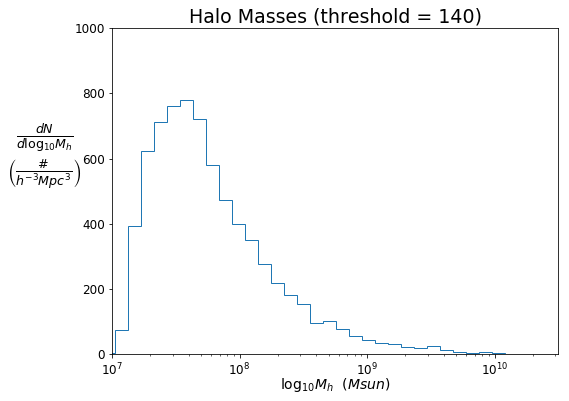

In [28]:
# create histogram
plt.figure(figsize=(8,6))
plt.hist(masslist1, bins, histtype='step', fill = False)
plt.title("Halo Masses (threshold = 140)", size = 19)
plt.axis([1e7, 10**10.5, 0, 1000])


# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= -2)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 30)

# create axis ticks 
plt.xscale('log')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

#show and save
plt.show()

#plt.savefig('./LG4_2048_40pc/rd0070/graph2.png', dpi = 300)

In [31]:
log_mass1 = np.log(masslist1) / log(10)
density1, bin_edges1 = np.histogram(log_mass1, bins= np.linspace(7, 10, 30))
log_density1 = np.log(density1) / log(10)

log_mass2 = np.log(masslist2) / log(10)
density2, bin_edges2 = np.histogram(log_mass2, bins= np.linspace(7, 10, 30))
log_density2 = np.log(density2) / log(10)

log_mass3 = np.log(masslist3) / log(10)
density3, bin_edges3 = np.histogram(log_mass3, bins= np.linspace(7, 10, 30))
log_density3 = np.log(density3) / log(10)

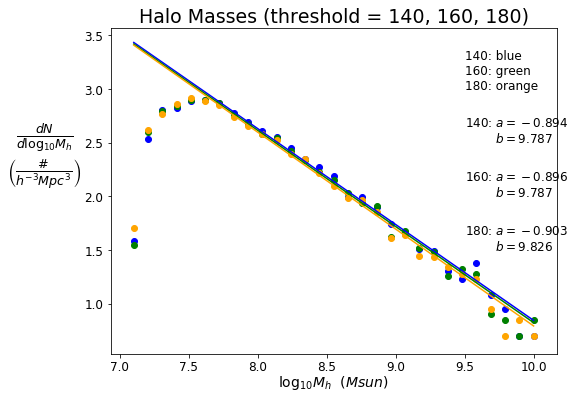

In [43]:
# specify figure size
plt.figure(figsize=(8,6))

#determine lines of best fit
bin_edges_fit1 = bin_edges1[6:-4]
log_density_fit1 = log_density1[5:-4]
par1 = np.polyfit(bin_edges_fit1, log_density_fit1, 1, full=True)
slope1, intercept1 = par1[0][0], par1[0][1]

bin_edges_fit2 = bin_edges2[6:-4]
log_density_fit2 = log_density2[5:-4]
par2 = np.polyfit(bin_edges_fit2, log_density_fit2, 1, full=True)
slope2, intercept2 = par2[0][0], par2[0][1]

bin_edges_fit3 = bin_edges3[6:-4]
log_density_fit3 = log_density3[5:-4]
par3 = np.polyfit(bin_edges_fit3, log_density_fit3, 1, full=True)
slope3, intercept3 = par3[0][0], par3[0][1]

# plot data and lines
bin_edges_red1 = bin_edges1[1::]
plt.scatter(bin_edges_red1, log_density1, color = 'blue')
plt.plot(bin_edges_red1, slope1 * bin_edges_red1 + intercept1, color = 'blue')

bin_edges_red2 = bin_edges2[1::]
plt.scatter(bin_edges_red2, log_density2, color = 'green')
plt.plot(bin_edges_red2, slope2 * bin_edges_red2 + intercept2, color = 'green')

bin_edges_red3 = bin_edges3[1::]
plt.scatter(bin_edges_red3, log_density3, color = 'orange')
plt.plot(bin_edges_red3, slope3 * bin_edges_red3 + intercept3, color = 'orange')

plt.title("Halo Masses (threshold = 140, 160, 180)", size = 19)

# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= 0)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 40)

# create axis ticks 
plt.yscale('linear')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

# add slope and intercept
annotation1 = "140: $a = {:1.3f}$ \n        $b = {:1.3f}$".format(slope1, intercept1)
annotation2 = "160: $a = {:1.3f}$ \n        $b = {:1.3f}$".format(slope2, intercept2)
annotation3 = "180: $a = {:1.3f}$ \n        $b = {:1.3f}$".format(slope3, intercept3)
legend = "140: blue \n160: green \n180: orange"
plt.text(9.5, 1.5, annotation3, size = 12)
plt.text(9.5, 2.0, annotation2, size = 12)
plt.text(9.5, 2.5, annotation1, size = 12)
plt.text(9.5, 3.0, legend, size = 12)

#show and save
plt.show()


In [ ]:
#--find ratio of stellar mass to halo mass
ratiolist = []

# dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')

for halo in hc.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    halo_mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        # create a sphere data object with halo position and radius
        radius = halo.quantities.get('virial_radius') * u.cm
        sp = ds.sphere([x.value/2.22535525e+25, y.value/2.22535525e+25, z.value/2.22535525e+25],
                        (radius.value, 'cm'))
        
        

In [45]:
# dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')

halo = hc.halo_list[-1]
# find coord and mass of halo
x = halo.quantities.get('particle_position_x') * u.cm
y = halo.quantities.get('particle_position_y') * u.cm
z = halo.quantities.get('particle_position_z') * u.cm
halo_mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun

# find stellar mass
radius = halo.quantities.get('virial_radius') * u.cm
sp = ds.sphere([x.value/2.22535525e+25, y.value/2.22535525e+25, z.value/2.22535525e+25],
                (radius.value, 'cm'))

# from below (just for test purposes)
stellar_mass = sp.quantities.total_mass() * u.g
stellar_mass = stellar_mass.to('Msun')
ratio = (stellar_mass) / halo_mass 
ratiolist.append(ratio)


yt : [INFO     ] 2017-07-13 16:06:39,370 Parameters: current_time              = 158.01757996843
yt : [INFO     ] 2017-07-13 16:06:39,371 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2017-07-13 16:06:39,373 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-13 16:06:39,374 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-07-13 16:06:39,375 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-13 16:06:39,376 Parameters: current_redshift          = 4.9999999832278
yt : [INFO     ] 2017-07-13 16:06:39,377 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-13 16:06:39,377 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-13 16:06:39,378 Parameters: hubble_constant           = 0.6933
Parsing Hierarchy : 100%|██████████| 44216/44216 [00:03<00:00, 14117.43it/s]
yt : [INFO     ] 2017-07-13 16:06:45,245 Gathering a field list (this may take a moment.)


NameError: name 'ratiolist' is not defined

In [ ]:
dd = ds.all_data()
ds.field_list

In [617]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'initial_mass'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_positio

In [622]:
print(ds.field_info["gas", "averaged_density"].get_source())

    def _averaged_field(field, data):
        nx, ny, nz = data[(ftype, basename)].shape
        new_field = data.ds.arr(np.zeros((nx-2, ny-2, nz-2), dtype=np.float64),
                                (just_one(data[(ftype, basename)]) *
                                 just_one(data[(ftype, weight)])).units)
        weight_field = data.ds.arr(np.zeros((nx-2, ny-2, nz-2),
                                            dtype=np.float64),
                                   data[(ftype, weight)].units)
        i_i, j_i, k_i = np.mgrid[0:3, 0:3, 0:3]

        for i, j, k in zip(i_i.ravel(), j_i.ravel(), k_i.ravel()):
            sl = [slice(i, nx-(2-i)), slice(j, ny-(2-j)), slice(k, nz-(2-k))]
            new_field += data[(ftype, basename)][sl] * data[(ftype, weight)][sl]
            weight_field += data[(ftype, weight)][sl]

        # Now some fancy footwork
        new_field2 = data.ds.arr(np.zeros((nx, ny, nz)), 
                                 data[(ftype, basename)].units)
        new_

In [613]:
DMdensity = sp.quantities.weighted_average_quantity(('enzo', 'Dark_Matter_Density'), 'ones').in_units('g/(cm**3)') * u.g / (u.cm ** 3)
volume = (4/3) * math.pi * (radius ** 3)
DM = DMdensity * volume
halo_mass / DM.to('Msun')

<Quantity 0.9100541492784664>

In [2]:
import pickle

In [59]:
# ignore LG4 since not all are found

# load newly calculated python halo lists
with open('./LG4_2048_40pc/rd0030/calc_list_3000', 'rb') as infile:
    calc_list4_0030 = pickle.load(infile)
with open('./LG35_2048_40pc/rd0030/calc_list_3000', 'rb') as infile:
    calc_list35_0030 = pickle.load(infile)
with open('./LG38_2048_40pc/rd0030/calc_list_3000', 'rb') as infile:
    calc_list38_0030 = pickle.load(infile)
with open('./LG76_2048_40pc/rd0030/calc_list_3000', 'rb') as infile:
    calc_list76_0030 = pickle.load(infile)
with open('./LG89_2048_40pc/rd0030/calc_list_3000', 'rb') as infile:
    calc_list89_0030 = pickle.load(infile)

In [60]:
# create master list for LG35
master_calc0030 = []
for halo in calc_list4_0030:
    master_calc0030.append(halo)
for halo in calc_list35_0030:
    master_calc0030.append(halo)
for halo in calc_list38_0030:
    master_calc0030.append(halo)
for halo in calc_list76_0030:
    master_calc0030.append(halo)
for halo in calc_list89_0030:
    master_calc0030.append(halo)

In [61]:
len(master_calc0030)

11585

In [62]:
# store master calc list
with open('./master_calc0030', 'wb') as outfile:
    pickle.dump(master_calc0030, outfile)

In [58]:
master_calc0070 == master_calc0090

False